In [71]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
# Define paths
path = 'C:/Users/Admin/Documents/GitHub/msba265-finalstorage/data_storage/CREAMA-D/AudioWAV'
if not os.path.exists(path):
    raise FileNotFoundError(f"Path does not exist: {path}")

In [73]:
# Collect audio file paths and emotions
audio_path = []
audio_emotion = []
print("Collecting audio file paths and extracting emotions...")
for audio in os.listdir(path):
    full_path = os.path.join(path, audio)
    if os.path.isfile(full_path):
        audio_path.append(full_path)
        emotion = audio.split('_')[2]
        emotion_map = {
            "SAD": "sad",
            "ANG": "angry",
            "DIS": "disgust",
            "NEU": "neutral",
            "HAP": "happy",
            "FEA": "fear"
        }
        audio_emotion.append(emotion_map.get(emotion, "unknown"))


In [74]:
# Create a dataset
emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis=1)
print(f"Dataset created with {len(dataset)} entries.")
print(dataset.head())

Dataset created with 7442 entries.
                                                Path Emotions
0  C:/Users/Admin/Documents/GitHub/msba265-finals...    angry
1  C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust
2  C:/Users/Admin/Documents/GitHub/msba265-finals...     fear
3  C:/Users/Admin/Documents/GitHub/msba265-finals...    happy
4  C:/Users/Admin/Documents/GitHub/msba265-finals...  neutral


In [75]:
# Dataset Overview
print("Dataset Overview:")
print(dataset.info())
print("Emotion distribution:\n", dataset['Emotions'].value_counts())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Path      7442 non-null   object
 1   Emotions  7442 non-null   object
dtypes: object(2)
memory usage: 116.4+ KB
None
Emotion distribution:
 Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


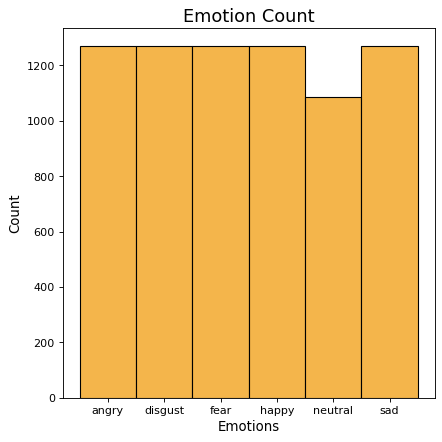

In [76]:
# Visualization of Emotion Distribution
plt.figure(figsize=(6, 6), dpi=80)
sns.histplot(dataset.Emotions, color='#F19C0E')
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.show()


--- Class Balance with Percentage ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_14792\63593201.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emotion_dist, x='Emotion', y='Count', palette='muted')


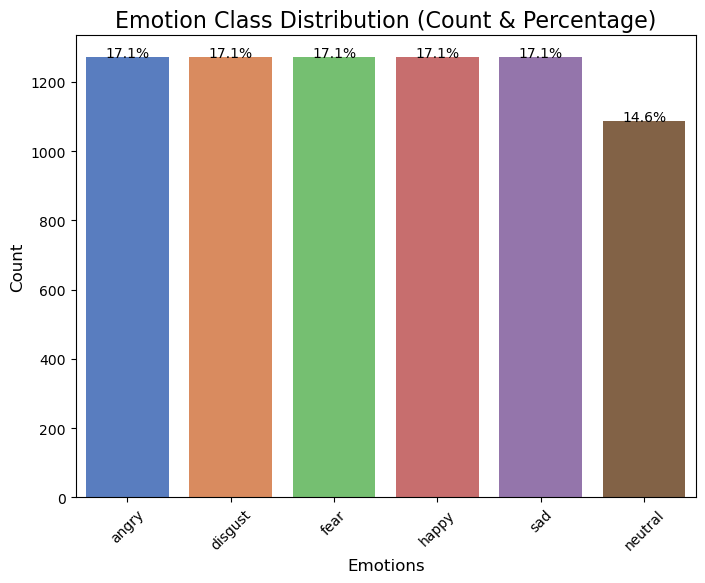

In [77]:
# Class Balance with Percentage
print("\n--- Class Balance with Percentage ---")
emotion_counts = dataset['Emotions'].value_counts()
emotion_percentages = (emotion_counts / len(dataset)) * 100

# Create a dataframe for plotting
emotion_dist = pd.DataFrame({
    'Emotion': emotion_counts.index,
    'Count': emotion_counts.values,
    'Percentage': emotion_percentages.values
})

# Plot count and percentage
plt.figure(figsize=(8, 6))
sns.barplot(data=emotion_dist, x='Emotion', y='Count', palette='muted')
for i, row in emotion_dist.iterrows():
    plt.text(i, row['Count'] + 1, f"{row['Percentage']:.1f}%", ha='center', fontsize=10)

plt.title("Emotion Class Distribution (Count & Percentage)", fontsize=16)
plt.xlabel("Emotions", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Print the emotion distribution wi



--- File Duration Analysis ---


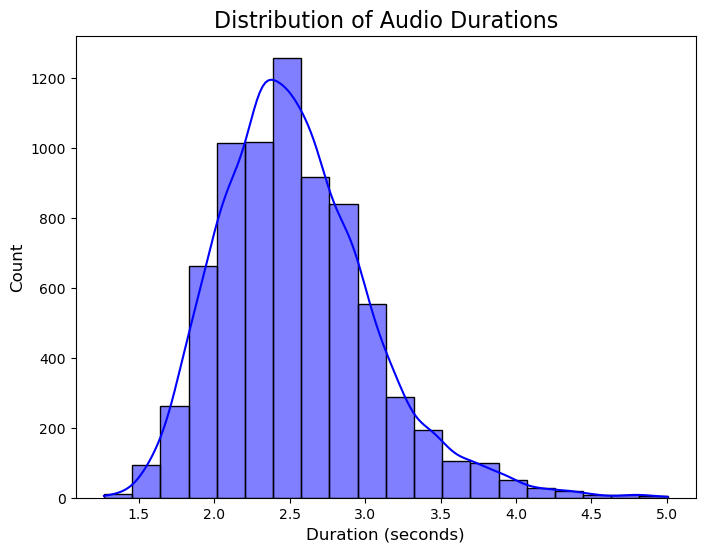

In [78]:
# File Duration Analysis
print("\n--- File Duration Analysis ---")
durations = []
for path in dataset['Path']:
    try:
        data, sr = librosa.load(path, sr=None)
        durations.append(len(data) / sr)
    except Exception as e:
        print(f"Error loading file {path}: {e}")
dataset['Duration'] = durations

plt.figure(figsize=(8, 6))
sns.histplot(durations, bins=20, kde=True, color='blue')
plt.title("Distribution of Audio Durations", fontsize=16)
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


--- Audio Feature Analysis ---


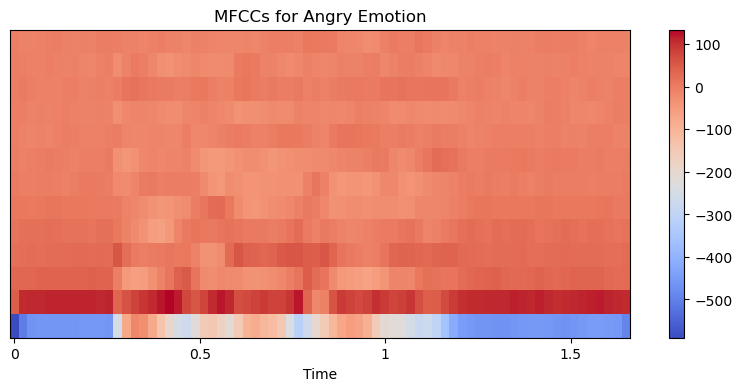

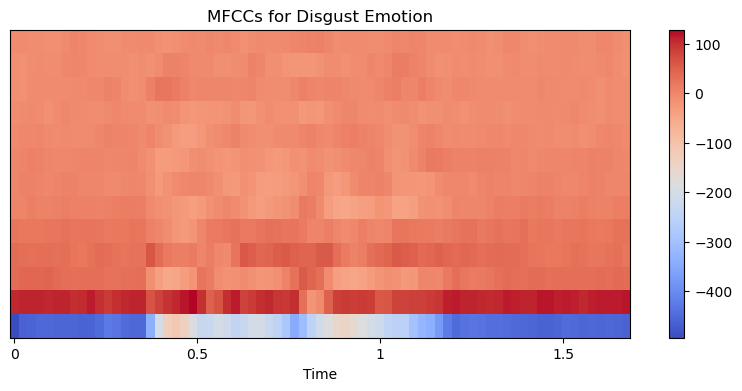

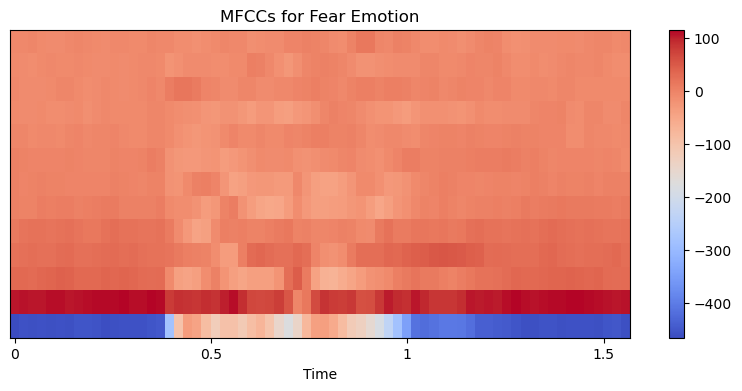

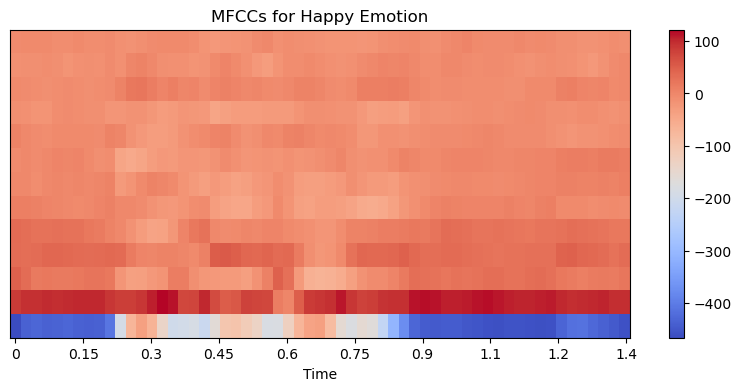

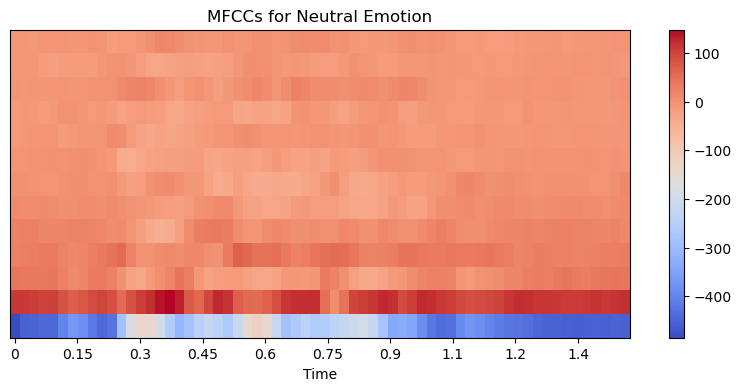

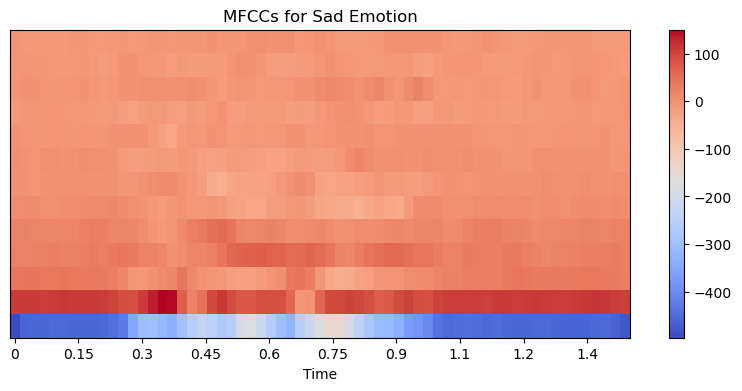

In [79]:
# Audio Feature Analysis (MFCC Example)
print("\n--- Audio Feature Analysis ---")
for emotion in dataset['Emotions'].unique():
    sample_path = dataset[dataset['Emotions'] == emotion].iloc[0]['Path']
    try:
        data, sr = librosa.load(sample_path, sr=16000)
        mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time', cmap='coolwarm')
        plt.colorbar()
        plt.title(f"MFCCs for {emotion.capitalize()} Emotion")
        plt.show()
    except Exception as e:
        print(f"Error processing MFCC for {emotion}: {e}")

In [80]:
# Define function for waveplot and spectrogram visualization
def plot_wave_and_spectrogram(file_path, emotion):
    try:
        data, sampling_rate = librosa.load(file_path, sr=16000)  # Consistent sampling rate
        plt.figure(figsize=(10, 6))
        plt.title(f"Waveplot for {emotion.capitalize()} Emotion", size=16)
        librosa.display.waveshow(data, sr=sampling_rate)
        plt.show()

        plt.figure(figsize=(10, 4))
        plt.title(f"Spectrogram for {emotion.capitalize()} Emotion", size=16)
        D = librosa.stft(data)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        librosa.display.specshow(S_db, sr=sampling_rate, x_axis='time', y_axis='hz', cmap='viridis')
        plt.colorbar(format='%+2.0f dB')
        plt.show()
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

Processing file: C:/Users/Admin/Documents/GitHub/msba265-finalstorage/data_storage/CREAMA-D/AudioWAV\1001_DFA_SAD_XX.wav


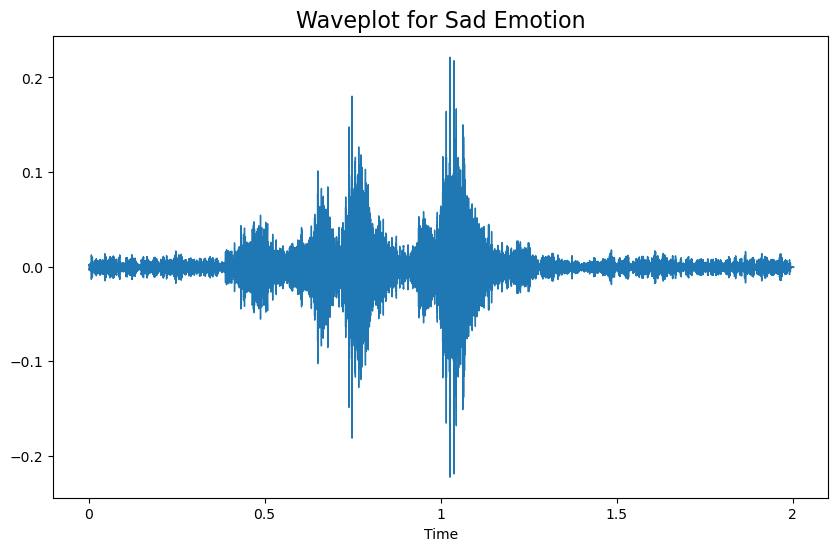

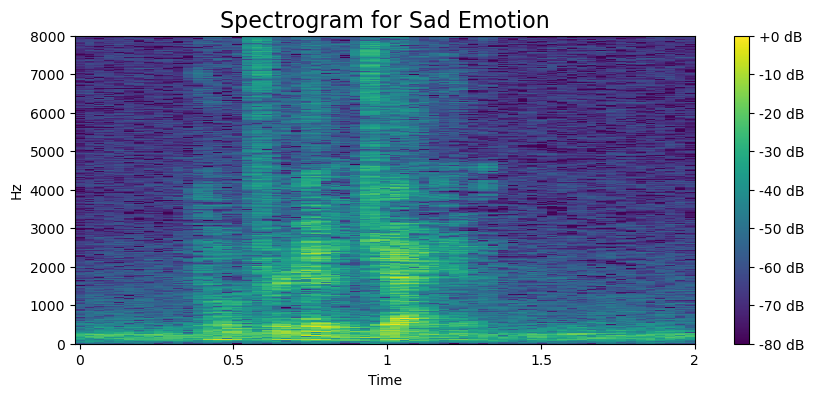

In [81]:
# Select a sample file for the 'sad' emotion
sad_files = dataset[dataset['Emotions'] == 'sad']['Path']
if not sad_files.empty:
    sample_file = sad_files.values[0]
    print(f"Processing file: {sample_file}")
    plot_wave_and_spectrogram(sample_file, "sad")
else:
    print("No files with 'sad' emotion found.")

In [82]:
# Outlier Detection
print("\n--- Outlier Detection ---")
duration_threshold = dataset['Duration'].quantile(0.99)
duration_outliers = dataset[dataset['Duration'] > duration_threshold]
print(f"Files with duration above {duration_threshold:.2f} seconds:")
print(duration_outliers)


--- Outlier Detection ---
Files with duration above 4.04 seconds:
                                                   Path Emotions  Duration
204   C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.404375
216   C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.237563
228   C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.270937
232   C:/Users/Admin/Documents/GitHub/msba265-finals...      sad  4.371062
254   C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.838188
...                                                 ...      ...       ...
6745  C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.337688
6757  C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.204187
6769  C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.404375
7249  C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.537875
7273  C:/Users/Admin/Documents/GitHub/msba265-finals...  disgust  4.070750

[70 rows x 3 columns]


In [83]:
# Feature extraction function
def extract_features(dataset, target_length=5000):
    X, Y = [], []
    print("Extracting features from audio files...")
    for path, emotion in zip(dataset['Path'], dataset['Emotions']):
        try:
            # Load audio file with consistent sampling rate
            value, sample_rate = librosa.load(path, sr=16000)

            # Add noise to audio
            noise_amp = 0.035 * np.random.uniform() * np.amax(value)
            value = value + noise_amp * np.random.normal(size=value.shape[0])

            # Extract MFCC features
            mfcc = librosa.feature.mfcc(y=value, sr=sample_rate, n_mfcc=13, n_fft=200, hop_length=512)
            mfcc = mfcc.T.flatten()

            # Extract Mel Spectrogram features
            mel = librosa.feature.melspectrogram(y=value, sr=sample_rate, hop_length=256, n_fft=512, n_mels=64)
            mel = librosa.power_to_db(mel ** 2).T.flatten()

            # Combine features
            features = np.hstack((mfcc, mel))

            # Pad or truncate features to ensure consistent length
            if len(features) > target_length:
                features = features[:target_length]
            else:
                features = np.pad(features, (0, max(0, target_length - len(features))), 'constant')

            X.append(features)
            Y.append(emotion)

        except Exception as e:
            print(f"Error processing file {path}: {e}")

    return np.array(X), np.array(Y)

In [84]:
# Extract features from a subset of the dataset (demo with first 50 samples)
X, Y = extract_features(dataset.head(50))
if X.size > 0:
    print(f"Features extracted: {X.shape}")
    extracted_audio_df = pd.DataFrame(X)
    extracted_audio_df["Emotion"] = Y
    print(extracted_audio_df.head())
else:
    print("No features extracted. Check your dataset or file paths.")


Extracting features from audio files...


c:\Users\Admin\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Features extracted: (50, 5000)
            0          1          2          3          4         5  \
0 -525.137186 -96.328694 -19.250294   8.767764   4.561855  3.730577   
1 -705.111508   4.263623   8.041943  17.133651   6.670944  8.038754   
2 -661.725568  43.042313   7.536065  12.449595   5.496998 -4.590267   
3 -549.080321 -42.765099  -0.460961  16.463799   6.708584  0.335787   
4 -597.798953 -30.486365  -4.138642  24.615068  12.917577  5.765372   

           6          7          8          9  ...       4991       4992  \
0  -2.708383   5.515119   2.638737  -4.156521  ... -58.421035 -58.421035   
1   6.320427  -5.940547   2.155935  -7.955907  ... -37.046477 -45.483921   
2  -1.802850  -5.854982   1.005833 -13.487717  ... -45.233018 -50.628201   
3  -7.213136   4.794095 -20.694224   8.119039  ... -49.298519 -36.951471   
4 -17.340939 -11.099713  -3.147081 -14.268043  ... -59.060526 -58.126586   

        4993       4994       4995       4996       4997       4998  \
0 -51.545248 -

In [85]:
# Cross-Validation Check
print("\n--- Cross-Validation Check ---")
train, test = train_test_split(dataset, test_size=0.2, stratify=dataset['Emotions'], random_state=42)
print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")
print("\nTraining set class distribution:\n", train['Emotions'].value_counts())
print("\nTest set class distribution:\n", test['Emotions'].value_counts())


--- Cross-Validation Check ---
Training set size: 5953
Test set size: 1489

Training set class distribution:
 Emotions
angry      1017
sad        1017
disgust    1017
fear       1017
happy      1016
neutral     869
Name: count, dtype: int64

Test set class distribution:
 Emotions
happy      255
angry      254
fear       254
disgust    254
sad        254
neutral    218
Name: count, dtype: int64
